In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit
np.random.seed(42069)

In [18]:
df = pd.read_csv('BaseDatosEstudio.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df[pd.notnull(df['lbdvidms'])]
df = df[pd.notnull(df['lbxpt21'])]
df = df[df['lbxpt21'] >= 25]
df.head()

,seqn,sddsrvyr,ridstatr,ridexmon,riagendr,ridageyr,ridagemn,ridageex,ridreth1,dmqmilit,...,wtdr2d.1,dr2tkcal,dr2tcalc,dr2tphos,bmxwt,bmxht,bmxbmi,bmxwaist,bpxsar,bpxdar
0,21005,3,2,1,1,19,232.0,233.0,4,2.0,...,2420.727816,2211.0,776.0,1292.0,137.6,164.5,50.85,135.9,NaN,NaN
1,21006,3,2,2,2,16,203.0,205.0,4,NaN,...,2312.365446,1218.0,493.0,705.0,55.2,163.0,20.78,73.6,98.0,50.0
2,21007,3,2,1,2,14,172.0,172.0,3,NaN,...,15327.120025,746.0,355.0,479.0,47.9,161.2,18.43,69.5,96.0,62.0
3,21008,3,2,2,1,17,208.0,209.0,4,2.0,...,18690.555956,2014.0,1435.0,1784.0,70.0,184.1,20.65,74.7,104.0,74.0
4,21009,3,2,2,1,55,671.0,672.0,3,2.0,...,170262.470827,3475.0,994.0,1710.0,103.1,181.6,31.26,118.4,118.0,85.0


[ 34.17092778 101.75868242   3.22192949]


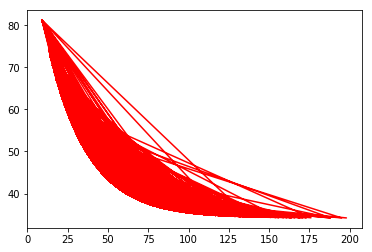

In [19]:
def func(x, asym, b, lrc):
    return asym + (b - asym) * np.exp(-x * np.exp(-lrc))

popt, pcov = curve_fit(func, df['lbdvidms'], df['lbxpt21'])
print(popt)
plt.plot(df['lbdvidms'], func(df['lbdvidms'], *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))